# 1. 
Calculate the number of movies included in each genre. Which genre includes the most 
movies, and which includes the fewest? Then, calculate th  average number of genre 
a movie belongs to. Identify the movie(s) that belong to the highest number of genre .
How many genres does this movie bel to?ong to?

In [2]:
import pandas as pd

movie_data = pd.read_csv("./movie.csv", encoding="latin1")
movie_data = movie_data.drop(columns=['Unknown'])

genre_counts = movie_data.iloc[:, 1:].sum()

most_movies_genre = genre_counts.idxmax()
most_movies_count = genre_counts.max()

fewest_movies_genre = genre_counts.idxmin()
fewest_movies_count = genre_counts.min()

average_genres_per_movie = movie_data.iloc[:, 1:].sum(axis=1).mean()
movie_genre_counts = movie_data.iloc[:, 1:].sum(axis=1)
max_genres_per_movie = movie_genre_counts.max()
movies_with_max_genres = movie_data[movie_genre_counts == max_genres_per_movie]['Title'].tolist()

print("Genre with the most movies:", most_movies_genre, "-", most_movies_count, "movies")
print("Genre with the fewest movies:", fewest_movies_genre, "-", fewest_movies_count, "movies")
print("Average number of genres per movie:", average_genres_per_movie)
print("Movies with the highest number of genres (", max_genres_per_movie, "):")
print(movies_with_max_genres)


Genre with the most movies: Drama - 716 movies
Genre with the fewest movies: Fantasy - 22 movies
Average number of genres per movie: 1.7193509615384615
Movies with the highest number of genres ( 6 ):
['Empire Strikes Back, The (1980)', 'Transformers: The Movie, The (1986)', "Kid in King Arthur's Court, A (1995)"]


# 2.
Use hierarchical clustering to group movies with similar genres. Follow the steps below:

### (a)

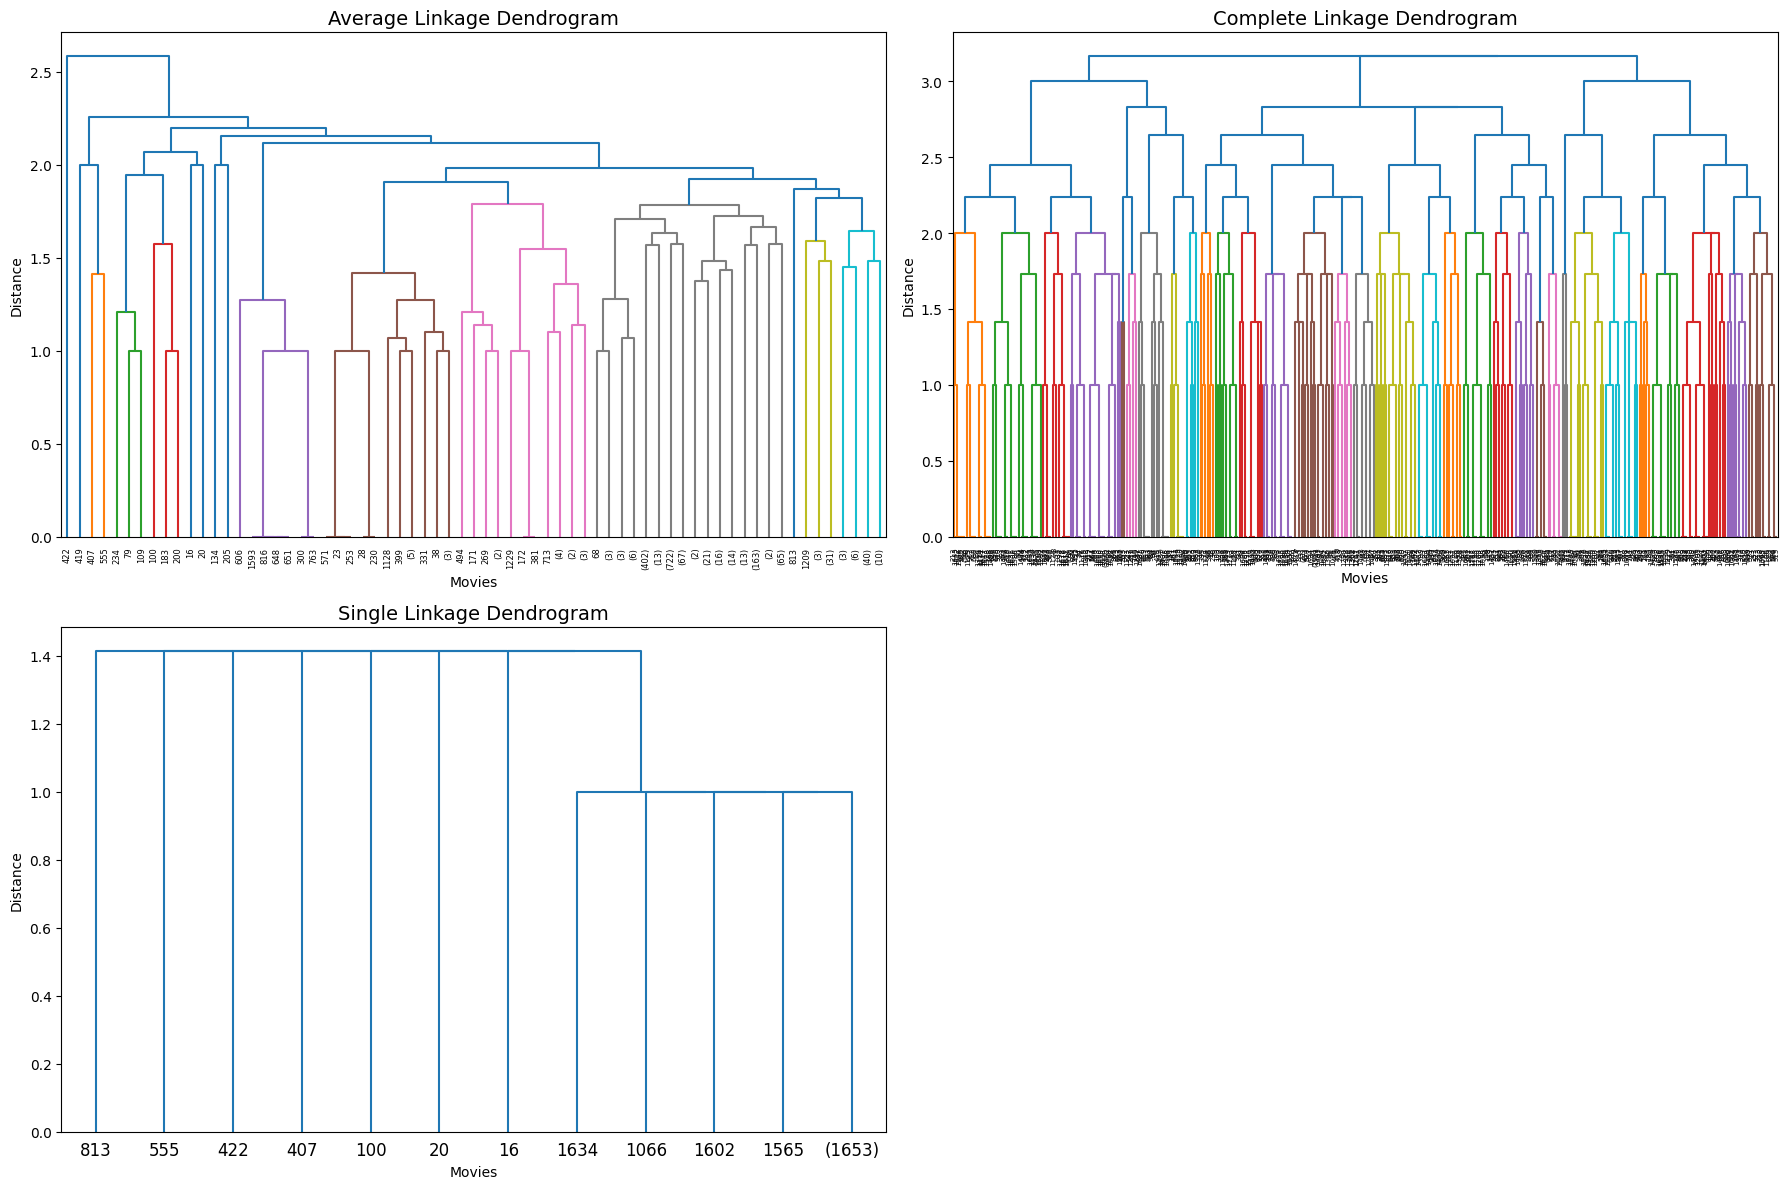

In [3]:
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
import matplotlib.pyplot as plt
import numpy as np

genre_data = movie_data.iloc[:, 1:].values
linkage_methods = ['average', 'complete', 'single']

plt.figure(figsize=(18, 12))
for i, method in enumerate(linkage_methods, 1):
    plt.subplot(2, 2, i)
    Z = linkage(genre_data, method=method)
    dendrogram(Z, truncate_mode='level', p=10)  # Re-added truncation for compact view
    plt.title(f"{method.capitalize()} Linkage Dendrogram", fontsize=14)
    plt.xlabel("Movies")
    plt.ylabel("Distance")
plt.tight_layout()
plt.show()

### (b)

참고 - 전체 계층구조에 대해 진행할 경우 시각적으로 쉽게 확인 가능한 그래프를 얻을 수 없어 p=10으로 진행하였다.

### Average Linkage

- 원소 간 거리 중 평균을 기준으로 분류하는 방식이다.
- 가장 적당한 정도의 분류를 얻을 수 있는 방식이다.
- The Ranges of Heights Values가 적절하다.
- 가장 시각적으로 직관적인 결과를 얻을 수 있다.

### Complete Linkage

- 원소 간 거리 중 최댓값을 기준으로 분류하는 방식이다.
- 가장 많은 병합이 일어나는 방식이다.
- The Ranges of Heights Values가 크다.

### Single Linkage

- 원소 간 거리 중 최솟값을 기준으로 분류하는 방식이다.
- 가장 적은 병합이 일어나는 방식이다.
- The Ranges of Heights Values가 작다.
- 클러스터의 병합이 직관적이지 않다.

### (c)

In [4]:
num_clusters = 10
cluster_distributions = {}

for method in linkage_methods:
    Z = linkage(genre_data, method=method)
    clusters = fcluster(Z, num_clusters, criterion='maxclust')
    unique_clusters = np.unique(clusters)
    cluster_mapping = {old_label: new_label for new_label, old_label in enumerate(unique_clusters, start=0)}
    clusters = np.array([cluster_mapping[label] for label in clusters])
    unique, counts = np.unique(clusters, return_counts=True)
    cluster_distributions[method] = dict(zip(unique, counts))

cluster_df = pd.DataFrame(cluster_distributions).fillna(0).astype(int)
cluster_df.index.name = "Cluster ID"

print("Cluster distribution for each linkage method:")
print(cluster_df)

Cluster distribution for each linkage method:
            average  complete  single
Cluster ID                           
0                 2       602    1657
1                 1         9       1
2                 6        59       1
3                 1       446       1
4                 1        90       1
5                 1       198       1
6                 1       106       1
7                 7       154       1
8              1643         0       0
9                 1         0       0


### (b)

### Average Linkage

- 하나의 클러스터에 전체 1664개 중 1643개가 집중되어 있고, 나머지에는 최소 한 개, 최대 7개로 구성되어 있다.
- Clustering이 적절히 구성되지 않았다.

### Complete Linkage

- 총 8개의 클러스터에 적절히 원소가 나뉘어져 있다.
- 최소 9개, 최대 602개의 원소로 구성되어 있다.

### Single Linkage

- 하나의 클러스터에 전체 1664개 중 1657개가 집중되어 있고, 나머지 7개의 클러스터에 1개씩 구성되어 있다.
- Clustering이 적절히 구성되지 않았다.

# 3.
Use k-means clustering to group movies with similar genres. Follow the steps below:

### (a)

In [5]:
from sklearn.cluster import KMeans
genre_data = movie_data.iloc[:, 1:].values

k = 10
n_init_values = [10, 100, 1000]
random_state = 123

ssw_results = {}

for n_init in n_init_values:
    kmeans = KMeans(n_clusters=k, n_init=n_init, random_state=random_state)
    kmeans.fit(genre_data)
    ssw_results[n_init] = kmeans.inertia_

In [6]:
print("SSW for different n_init values:")
print(ssw_results)

SSW for different n_init values:
{10: 923.4500191064853, 100: 908.8065008196369, 1000: 900.8112007412965}


### (b)

In [7]:
kmeans = KMeans(n_clusters=k, n_init=1000, random_state=random_state)
kmeans.fit(genre_data)
clusters = kmeans.labels_

cluster_distribution = pd.Series(clusters).value_counts().sort_index()

In [8]:
print("\nCluster distribution for k=10:")
print(cluster_distribution)


Cluster distribution for k=10:
0    296
1    523
2    170
3     96
4    116
5     85
6     78
7     76
8    154
9     70
Name: count, dtype: int64


### (c)

In [9]:
cluster_genre_proportions = pd.DataFrame(
    [genre_data[clusters == i].mean(axis=0) for i in range(k)],
    columns=movie_data.columns[1:],
    index=[f"Cluster {i}" for i in range(k)]
)
print("\nCluster-Genre Proportions:")
print(cluster_genre_proportions)


Cluster-Genre Proportions:
             Action  Adventure  Animation  Childrens    Comedy     Crime  \
Cluster 0  0.050676   0.003378   0.013514   0.094595  1.000000  0.023649   
Cluster 1  0.047801   0.007648   0.000000   0.022945  0.000000  0.070746   
Cluster 2  0.458824   0.094118   0.011765   0.005882  0.017647  0.135294   
Cluster 3  0.020833   0.020833   0.010417   0.010417  1.000000  0.000000   
Cluster 4  0.982759   0.500000   0.008621   0.051724  0.077586  0.112069   
Cluster 5  0.070588   0.011765   0.000000   0.000000  0.000000  0.047059   
Cluster 6  0.038462   0.012821   0.000000   0.025641  1.000000  0.051282   
Cluster 7  0.052632   0.000000   0.000000   0.000000  0.144737  0.026316   
Cluster 8  0.000000   0.077922   0.019481   0.000000  0.000000  0.110390   
Cluster 9  0.028571   0.542857   0.442857   1.000000  0.128571  0.000000   

           Documentary     Drama   Fantasy  FilmNoir    Horror   Musical  \
Cluster 0     0.003378  0.000000  0.013514  0.000000  0.000

In [10]:
dominant_genres = cluster_genre_proportions.idxmax(axis=1)

print("\nDominant genre in each cluster:")
print(dominant_genres)


Dominant genre in each cluster:
Cluster 0         Comedy
Cluster 1          Drama
Cluster 2       Thriller
Cluster 3         Comedy
Cluster 4         Action
Cluster 5          Drama
Cluster 6         Comedy
Cluster 7         Horror
Cluster 8    Documentary
Cluster 9      Childrens
dtype: object


### (d)

In [11]:
titanic_cluster = clusters[movie_data[movie_data['Title'] == "Titanic (1997)"].index[0]]
recommended_movies = movie_data[clusters == titanic_cluster]['Title'].sample(5, random_state=random_state).tolist()

print("\nRecommended movies for Titanic (1997):")
print(recommended_movies)


Recommended movies for Titanic (1997):
['Beautiful Thing (1996)', "'Til There Was You (1997)", 'Diva (1981)', 'Professional, The (1994)', 'Circle of Friends (1995)']


### (e)

In [12]:
k_values = [5, 10, 20]
n_init = 1000
random_state = 123

cluster_results = {}

def analyze_clusters(k, genre_data, movie_data):
    kmeans = KMeans(n_clusters=k, n_init=n_init, random_state=random_state)
    kmeans.fit(genre_data)
    clusters = kmeans.labels_

    cluster_distribution = pd.Series(clusters).value_counts().sort_index()

    cluster_genre_proportions = pd.DataFrame(
        [genre_data[clusters == i].mean(axis=0) for i in range(k)],
        columns=movie_data.columns[1:],
        index=[f"Cluster {i}" for i in range(k)]
    )

    dominant_genres = cluster_genre_proportions.idxmax(axis=1)
    return cluster_distribution, cluster_genre_proportions, dominant_genres

for k in k_values:
    cluster_distribution, cluster_genre_proportions, dominant_genres = analyze_clusters(k, genre_data, movie_data)
    cluster_results[k] = {
        "distribution": cluster_distribution,
        "proportions": cluster_genre_proportions,
        "dominant_genres": dominant_genres
    }

for k in k_values:
    print(f"\nResults for k={k}:")
    print("Cluster Distribution:")
    print(cluster_results[k]["distribution"])
    print("\nCluster-Genre Proportions:")
    print(cluster_results[k]["proportions"])
    print("\nDominant Genres:")
    print(cluster_results[k]["dominant_genres"])

print("\nRecommendations for 'Titanic (1997)':")
for k in k_values:
    clusters = KMeans(n_clusters=k, n_init=n_init, random_state=random_state).fit_predict(genre_data)
    titanic_cluster = clusters[movie_data[movie_data['Title'] == "Titanic (1997)"].index[0]]
    recommended_movies = movie_data[clusters == titanic_cluster]['Title'].sample(5, random_state=random_state).tolist()
    print(f"\nFor k={k}, recommended movies from the same cluster as 'Titanic (1997)':")
    print(recommended_movies)



Results for k=5:
Cluster Distribution:
0    486
1    257
2    165
3    564
4    192
Name: count, dtype: int64

Cluster-Genre Proportions:
             Action  Adventure  Animation  Childrens    Comedy     Crime  \
Cluster 0  0.037037   0.016461   0.020576   0.082305  1.000000  0.024691   
Cluster 1  0.000000   0.151751   0.108949   0.210117  0.000000  0.066148   
Cluster 2  0.060606   0.018182   0.006061   0.000000  0.018182  0.181818   
Cluster 3  0.051418   0.015957   0.000000   0.030142  0.000000  0.054965   
Cluster 4  1.000000   0.385417   0.015625   0.046875  0.067708  0.088542   

           Documentary     Drama   Fantasy  FilmNoir    Horror   Musical  \
Cluster 0     0.002058  0.181070  0.014403  0.000000  0.022634  0.041152   
Cluster 1     0.178988  0.000000  0.027237  0.031128  0.182879  0.097276   
Cluster 2     0.000000  0.363636  0.006061  0.084848  0.084848  0.000000   
Cluster 3     0.005319  1.000000  0.005319  0.003546  0.008865  0.015957   
Cluster 4     0.000000  

# 4.

In [13]:
from sklearn.metrics.pairwise import cosine_similarity

cosine_sim = cosine_similarity(genre_data)

titanic_index = movie_data[movie_data['Title'] == "Titanic (1997)"].index[0]
twelve_monkeys_index = movie_data[movie_data['Title'] == "Twelve Monkeys (1995)"].index[0]

titanic_sim_scores = cosine_sim[titanic_index]
titanic_sim_scores[titanic_index] = -1
titanic_sim_scores[twelve_monkeys_index] = -1

top_5_indices = np.argsort(titanic_sim_scores)[-5:][::-1]
recommended_movies = movie_data.iloc[top_5_indices]['Title'].tolist()

print("Recommended movies for a user who liked 'Titanic (1997)':")
print(recommended_movies)



Recommended movies for a user who liked 'Titanic (1997)':
['Cyrano de Bergerac (1990)', 'Man in the Iron Mask, The (1998)', 'First Knight (1995)', 'Crying Game, The (1992)', 'Sense and Sensibility (1995)']
